# Statistic and analysis results

In [28]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from utils import dice

In [29]:
# Test dataset
DS_PATH = './dataset/TestDataset'
DS_NAMES = ['CVC-300', 'CVC-ClinicDB', 'Kvasir', 'CVC-ColonDB', 'ETIS-LaribPolypDB']

In [30]:
# Result path
PRED_PATH = './result_map/spatter_noise'
PRED_NAME = PRED_PATH.split("/")[-1]

## Calculate result

In [31]:
def dice_vs_size():
    result = {
        'CVC-300': {
            'size': [],
            'dice': []
        }, 
        'CVC-ClinicDB': {
            'size': [],
            'dice': []
        }, 
        'Kvasir': {
            'size': [],
            'dice': []
        }, 
        'CVC-ColonDB': {
            'size': [],
            'dice': []
        }, 
        'ETIS-LaribPolypDB': {
            'size': [],
            'dice': []
        },
    }

    # For each dataset
    for ds_idx, ds_name in enumerate(DS_NAMES):
        print("Processing", ds_name)
        # Get imgs of dataset
        img_dir = f"{DS_PATH}/{DS_NAMES[ds_idx]}/images"
        imgs = os.listdir(img_dir)
        
        # For each img
        for img_idx in range(len(imgs)):

            # Get GT of img
            gt_dir = f"{DS_PATH}/{DS_NAMES[ds_idx]}/masks"
            gt_filename = imgs[img_idx]
            gt_path = f"{DS_PATH}/{DS_NAMES[ds_idx]}/masks/{gt_filename}"

            # Get prediction
            pred_dir = f"{PRED_PATH}/{DS_NAMES[ds_idx]}"
            imgs = os.listdir(pred_dir)
            pred_filename = imgs[img_idx]
            pred_path = f"{PRED_PATH}/{DS_NAMES[ds_idx]}/{pred_filename}"

            # Read GT, pred
            gt = cv2.imread(gt_path, cv2.IMREAD_GRAYSCALE)
            pred = cv2.imread(pred_path, cv2.IMREAD_GRAYSCALE)

            # Percentage of white pixel per total number of pixel
            percent = gt[gt > 0].size / gt.size * 100
            result[ds_name]['size'].append(percent)
            
            # Dice score
            dice_score = dice(gt / 255, pred / 255) * 100
            result[ds_name]['dice'].append(dice_score)

    print("Process done!")
    return result

In [35]:
result = dice_vs_size()

Processing CVC-300
Processing CVC-ClinicDB
Processing Kvasir
Processing CVC-ColonDB
Processing ETIS-LaribPolypDB
Process done!


In [33]:
def combine(result):
    new_result = result.copy()
    new_result["all"] = {
        "size": [],
        "dice": []
    }
    for ds_name, value in result.items():
        new_result["all"]["size"].extend(value["size"])
        new_result["all"]["dice"].extend(value["dice"])
    return new_result

In [36]:
result_combined = combine(result)

## Plot

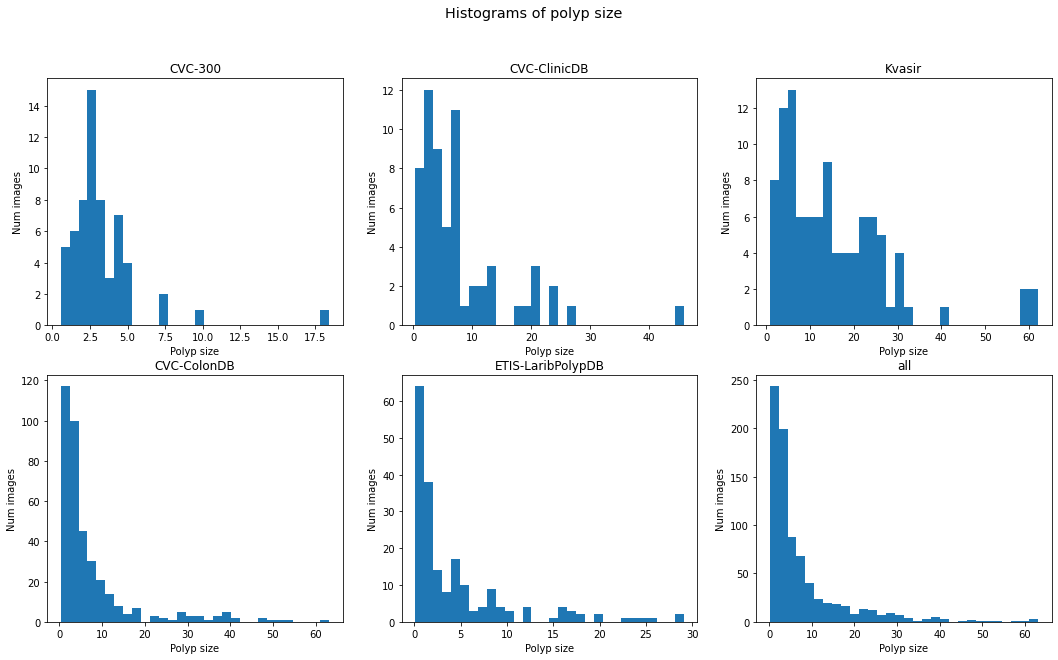

In [61]:
fig = plt.figure(figsize=(18, 10))
suptitle = fig.suptitle("Histograms of polyp size", fontsize="x-large")
for i, (ds_name, value) in enumerate(result_combined.items()):
    ax = fig.add_subplot(2,3,i+1)
    ax.hist(value["size"], bins=30)
    ax.set_title(ds_name)
    ax.set_xlabel("Polyp size")
    ax.set_ylabel("Num images")

plt.show()

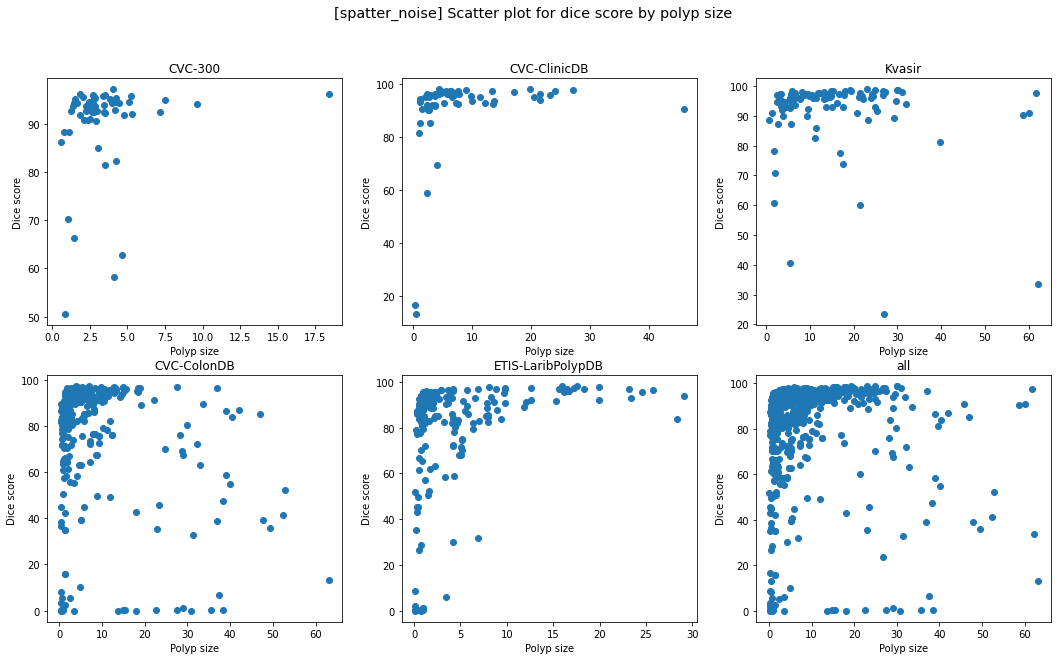

In [59]:
fig = plt.figure(figsize=(18, 10))
suptitle = fig.suptitle(f"[{PRED_NAME}] Scatter plot for dice score by polyp size", fontsize="x-large")
for i, (ds_name, value) in enumerate(result_combined.items()):
    ax = fig.add_subplot(2,3,i+1)
    ax.scatter(value["size"], value["dice"])
    ax.set_title(ds_name)
    ax.set_xlabel("Polyp size")
    ax.set_ylabel("Dice score")

plt.show()